#Description: StTerm Memory (LSTM)
#For Apple Inc.

In [8]:
#!pip install keras

In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [3]:
import datetime
# Set the start and end dates
start_date = datetime.datetime(2012, 1, 1)
end_date = datetime.datetime(2019, 12, 17)

# Get the stock data for Apple (AAPL) from Yahoo Finance
df = yf.download('AAPL', start=start_date, end=end_date)
#show data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449694,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516599,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655553,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787858,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767571,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.390465,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.948204,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.116264,137310400


In [4]:
#Get the number of rows and columns
df.shape

(2002, 6)

Text(0, 0.5, 'Close price in USD')

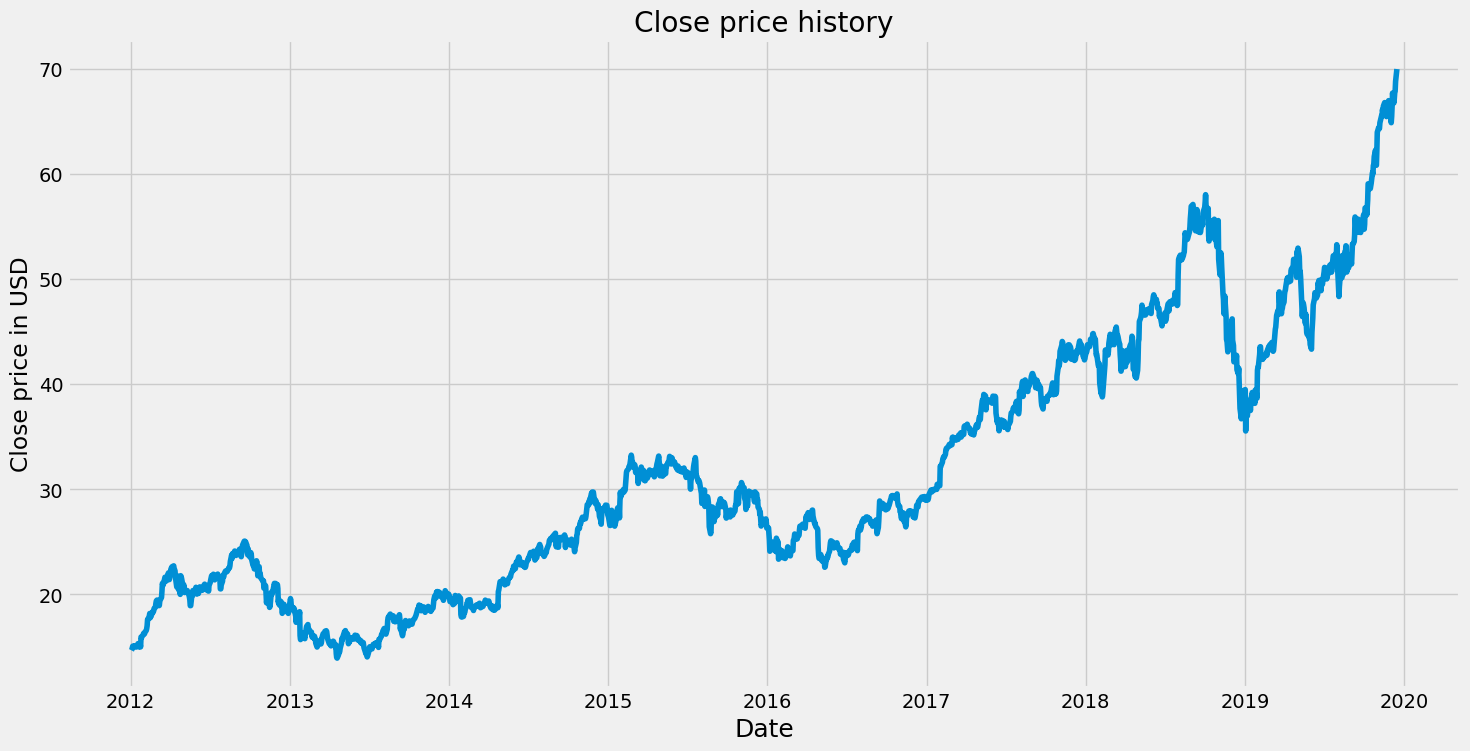

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in USD')

In [6]:
#Create a new dataframe with only "Close" column
data=df.filter(['Close'])
#Convert to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1602

In [7]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [8]:
#Create the training dataset
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i < 62:
    print(x_train)
    print(y_train,"\n")

# x_train=np.array(train_data[0:training_data_len,0])
# y_train=np.array(train_data[60:,0])
# print(x_train)
# print(y_train[0])

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152] 

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.018

In [9]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1542, 60, 1)

In [11]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 56s 30ms/step - loss: 8.0102e-04


In [14]:
#Create the testing dataset
#Create a new array containing scaled values from index 1543 to 2002
test_data=scaled_data[training_data_len-60:,:]
#Create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [15]:
#Convert the data to numpy array
x_test=np.array(x_test)


In [16]:
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 15ms/step


In [18]:
#Get the root mean squared error (RMSE)
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.458727283477783

<ipython-input-19-df1b49914291>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


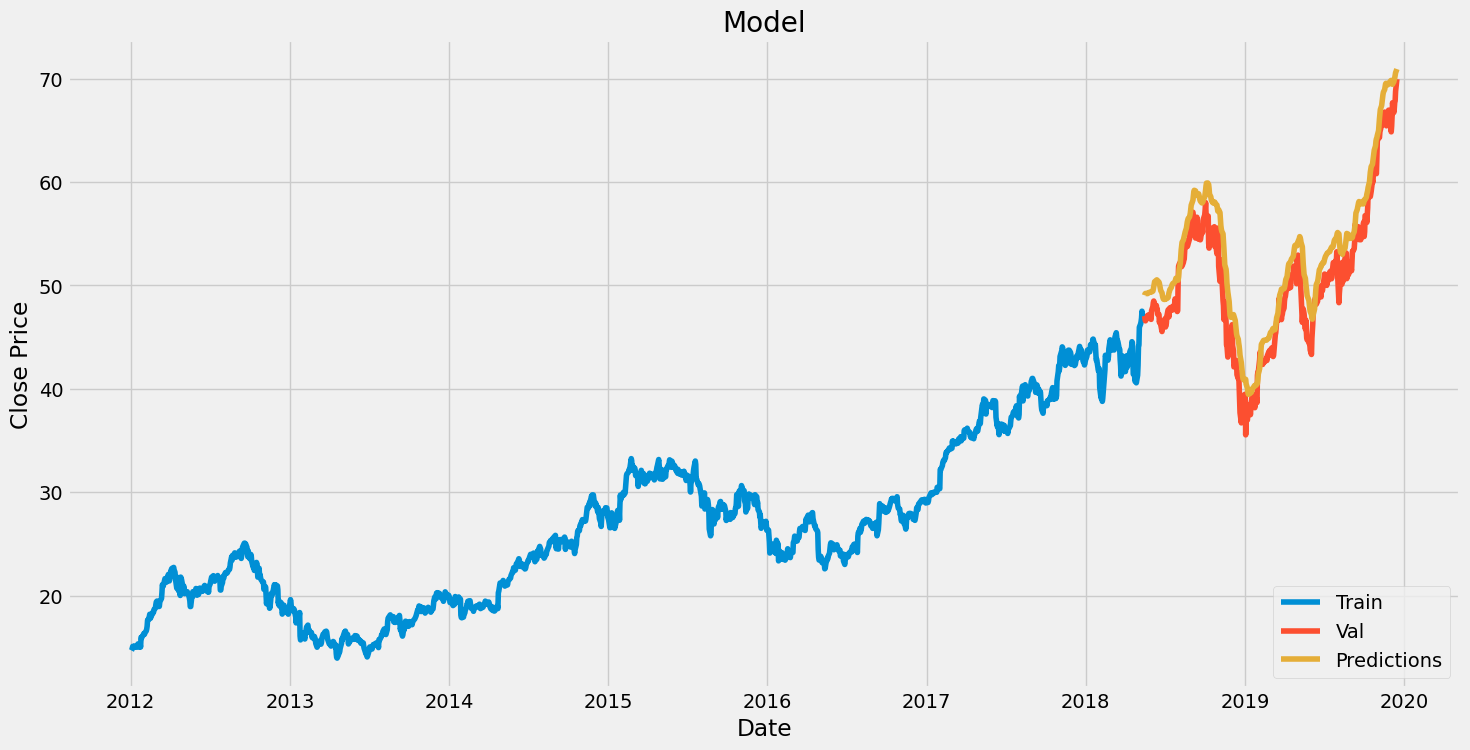

In [19]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,49.052059
2018-05-17,46.747501,49.180664
2018-05-18,46.577499,49.229183
2018-05-21,46.907501,49.213112
2018-05-22,46.790001,49.218136
...,...,...
2019-12-10,67.120003,69.886223
2019-12-11,67.692497,70.072952
2019-12-12,67.864998,70.319321


In [63]:
#Get the quote
apple_quote=df
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 days closing value
last_60days=new_df[-60:].values
print(last_60days[-5:])
#Scale the data values between 0 and 1
last_60days_scaled=scaler.transform(last_60days)
#Create an empty list


[[67.12000275]
 [67.69249725]
 [67.86499786]
 [68.78749847]
 [69.96499634]]
1/1 [==============================] - 0s 42ms/step
[[71.457245]]


In [27]:
#Get the quote
end_date = datetime.datetime(2019, 12, 18)
apple_quote2=yf.download('AAPL', start=start_date, end=end_date)
print(apple_quote2[-1:])

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-12-17  69.892502  70.442497  69.699997  70.102501  68.296097  114158400


Predict for next 50 days


In [55]:
last_60days=new_df[-60:].values
print(last_60days.shape)
print(last_60days[-5:])

(60, 1)
[[67.12000275]
 [67.69249725]
 [67.86499786]
 [68.78749847]
 [69.96499634]]


In [64]:

# last_60days=np.append(last_60days,pred_price)
# last_60days=np.delete(last_60days,0)
#   # print(last_60days[-5:])

#   #Reshape
# last_60days=np.reshape(last_60days,(len(last_60days),1))
#   #Scale the data values between 0 and 1
# print(last_60days[-5])
last_60days_scaled=scaler.transform(last_60days)
# print(last_60days_scaled[-5])
for i in range(60):

  X_test=[]
  #Append the past 60 days
  X_test.append(last_60days_scaled)
  #Convert the X_test to numpy array
  X_test=np.array(X_test)
  #Reshape the data
  X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
  #Get predicted scaled price
  pred_price=model.predict(X_test)
  #undo the scaling
  pred_=scaler.inverse_transform(pred_price)
  print(pred_)


  last_60days_scaled=np.append(last_60days_scaled,pred_price)
  last_60days_scaled=np.delete(last_60days_scaled,0)
  # print(last_60days[-5:])

  #Reshape
  last_60days_scaled=np.reshape(last_60days_scaled,(len(last_60days_scaled),1))


1/1 [==============================] - 0s 57ms/step
[[71.457245]]
1/1 [==============================] - 0s 88ms/step
[[72.179726]]
1/1 [==============================] - 0s 63ms/step
[[72.981766]]
1/1 [==============================] - 0s 41ms/step
[[73.818474]]
1/1 [==============================] - 0s 35ms/step
[[74.667984]]
1/1 [==============================] - 0s 26ms/step
[[75.51965]]
1/1 [==============================] - 0s 29ms/step
[[76.36837]]
1/1 [==============================] - 0s 26ms/step
[[77.21159]]
1/1 [==============================] - 0s 30ms/step
[[78.04804]]
1/1 [==============================] - 0s 28ms/step
[[78.87698]]
1/1 [==============================] - 0s 32ms/step
[[79.69795]]
1/1 [==============================] - 0s 26ms/step
[[80.510544]]
1/1 [==============================] - 0s 27ms/step
[[81.31438]]
1/1 [==============================] - 0s 27ms/step
[[82.10907]]
1/1 [==============================] - 0s 27ms/step
[[82.89412]]
1/1 [==============

In [69]:

result=scaler.inverse_transform(last_60days_scaled)


[*********************100%%**********************]  1 of 1 completed
(60, 6)


<ipython-input-68-18069b8f6559>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=result


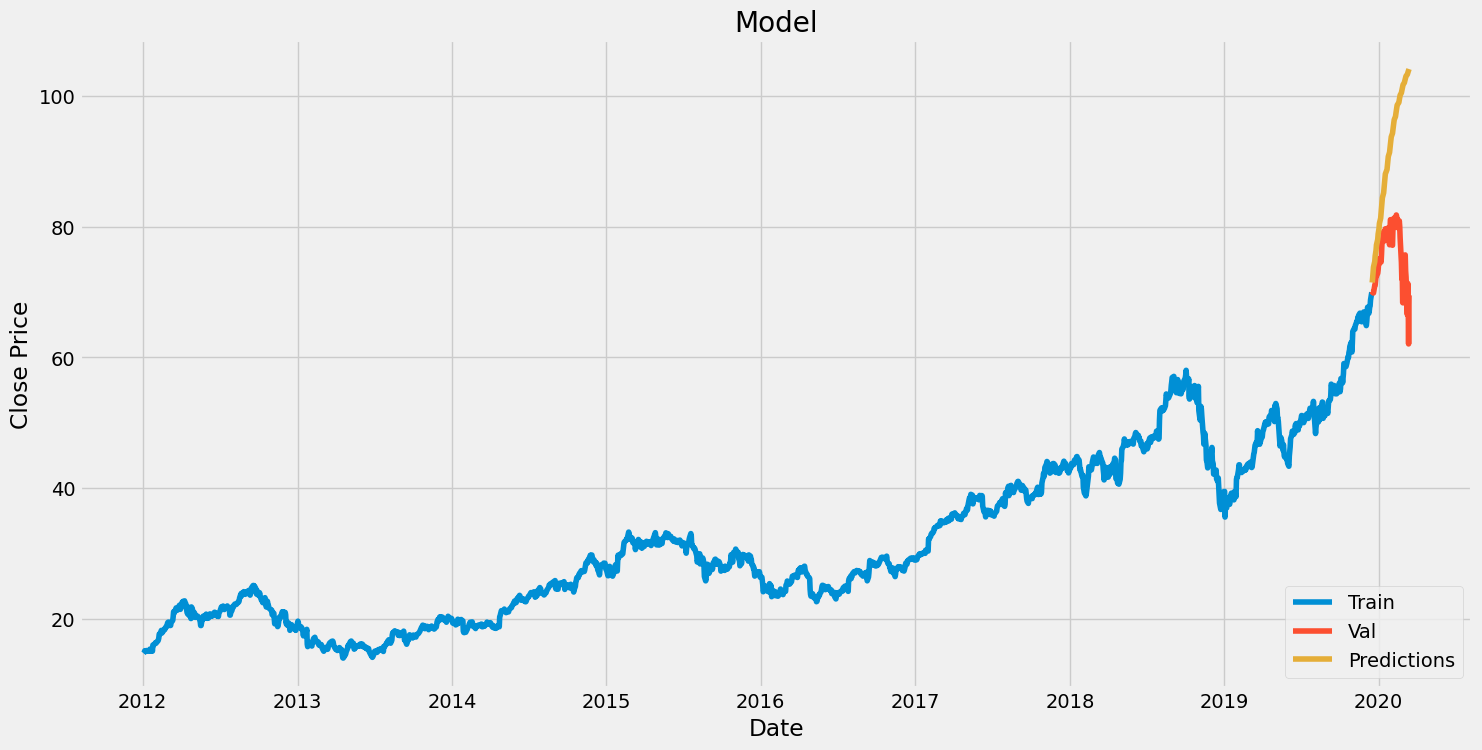

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-03-09  65.937500  69.522499  65.750000  66.542503  64.981689  286744800   
2020-03-10  69.285004  71.610001  67.342499  71.334999  69.661781  285290000   
2020-03-11  69.347504  70.305000  67.964996  68.857498  67.242378  255598800   
2020-03-12  63.985001  67.500000  62.000000  62.057499  60.601887  418474000   
2020-03-13  66.222504  69.980003  63.237499  69.492500  67.862503  370732000   

            Predictions  
Date                     
2020-03-09   103.313411  
2020-03-10   103.535562  
2020-03-11   103.748337  
2020-03-12   103.952057  
2020-03-13   104.147015  


In [68]:
#Get the quote
end_date = datetime.datetime(2020, 3, 16)
apple_quote2=yf.download('AAPL', start=start_date, end=end_date)

# #Plot the data
train=data[:]
valid=apple_quote2[data.shape[0]:]
print(valid.shape)
valid['Predictions']=result

#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

print(valid[-5:])

#This concludes that the model can only predict for short term but not for long term